### Implementation of PCA

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# to suppress the warnings:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
# loading the iris dataset 
iris = datasets.load_iris()
X = iris.data

In [5]:
X.shape

(150, 4)

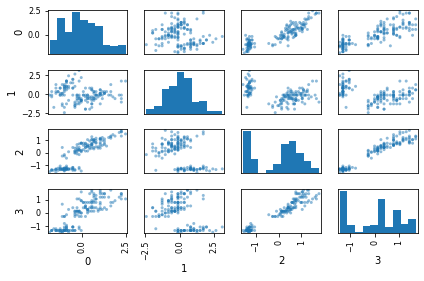

In [8]:
### Understanding the data using pair plot:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

### Steps invovled in PCA
 - 1) Standardize the data
 - 2) Calculate the covariance matrix
 - 3) Calculate the eigenvectors and the eigenvalues of the covariance matrix
 - 4) Rank the eigenvectors by its corresponding eigenvalues and obtain the principal components with its column vectors corresponding to the top k eigenvectors

### Step 1: Normalize the data

- First step is to normalize the data that we have so that PCA works properly.
- This is done by subtracting the respective means from the numbers in the respective column.
- So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.

In [6]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Step 2: Calculate the covariance matrix

In [7]:
cov_matrix = np.cov(X_std.T)
print(cov_matrix.shape)
print('Covariance Matrix \n%s', cov_matrix)

(4, 4)
Covariance Matrix 
%s [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### Step 3: Calculate the eigenvalues and eigenvectors

In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(len(eig_vals))
print(eig_vecs.shape)

4
(4, 4)


In [10]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

 Eigen Values 
%s [2.93808505 0.9201649  0.14774182 0.02085386]


In [13]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse=True)

In [14]:
eig_vals_sorted = [eigen_pairs_sorted[i][0] for i in range (len(eig_vals))]
eig_vecs_sorted = [eigen_pairs_sorted[i][1] for i in range (len(eig_vals))]

In [15]:
# Cumulative Variance Explained:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


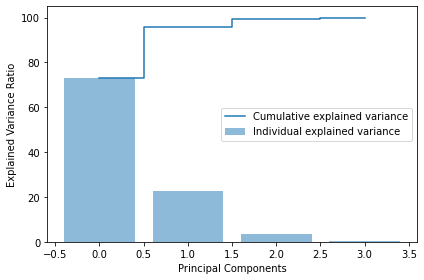

In [16]:
# Summary Plot of the cumulative Variance Explained:

plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Inference:

The first three principal components explain 99% of the variance in the data and these three PCA will have to be named because they represent composite of original dimensions.

We can also determine the number of PCA components based on how much variation we want the data to explain. Let's say we want to see hoy many PCA compenents explain 95% of the variance in data. For that we can proceed the following way:



In [52]:
# find the length of the variable that explains cumulative Variance Explained and customize it to the variation we want:

len(cum_var_exp[cum_var_exp<96])

2

In the above data, two variables explain 95% of the variation in the data.

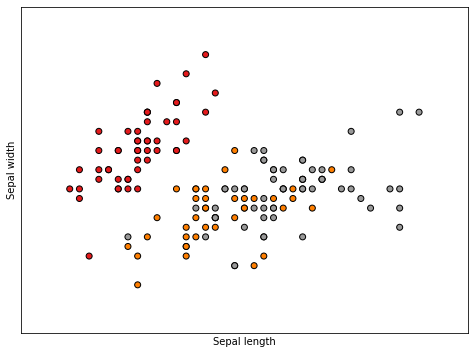

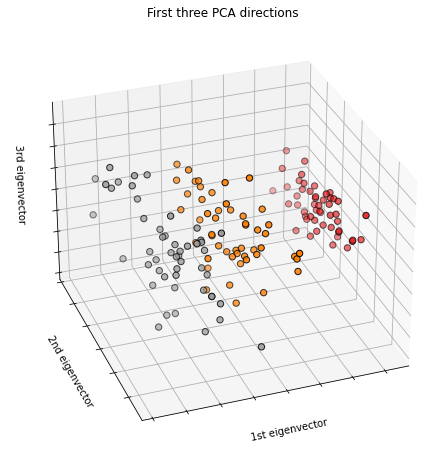

In [18]:
# Plotting the first 3 Eigen Vectors or the Prinicipal components:

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

## Get the min and max of the two dimensions and extend the margins by .5 on both sides to get the data points away
## from the origin in the plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

## plot frame size
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points (scatter plot, all rows first and second column only)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


## plotting the axes with ticks
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [19]:
# splitting the data into test and train:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Scaling the data:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building Model using Decision Tree algorithm  before Applying PCA

In [31]:
# building the model 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# predicting the y values:
y_pred_DT = model.predict(X_test)

In [27]:
# Confusion Matrix:

cm_DT= confusion_matrix(y_test, y_pred_DT)
print('Confusion Matrix:')
cm_DT

Confusion Matrix:


array([[11,  0,  0],
       [ 0,  7,  6],
       [ 0,  4,  2]], dtype=int64)

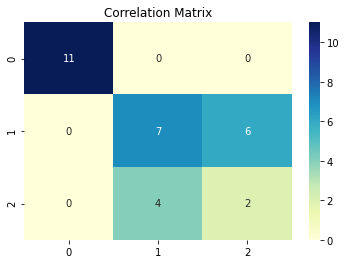

In [35]:
# Plotting the heatmap:

sns.heatmap(cm_DT,annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [38]:
# Classification Report:

print('Classification Report:')
classification1=classification_report(y_test,y_pred_DT)
print(classification1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.64      0.54      0.58        13
           2       0.25      0.33      0.29         6

    accuracy                           0.67        30
   macro avg       0.63      0.62      0.62        30
weighted avg       0.69      0.67      0.68        30



In [39]:
ac = accuracy_score(y_test, y_pred_DT)
print("Accuracy Score:", ac)

Accuracy Score: 0.6666666666666666


### Building Model using Decision Tree algorithm  after Applying PCA

In [40]:
# splitting the data into test and train:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
# Scaling the data:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
# Applying PCA using sklearn:
pca = PCA()
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [43]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.53028305, 0.46971695])

In [44]:
model2=tree.DecisionTreeClassifier()
model2.fit(X_train_2,y_train)


DecisionTreeClassifier()

In [45]:
# Predicitng the values:
y_pred_DT_2 = model2.predict(X_test_2)


# Confusion Matrix:
cm_PCA= confusion_matrix(y_test, y_pred_DT_2)

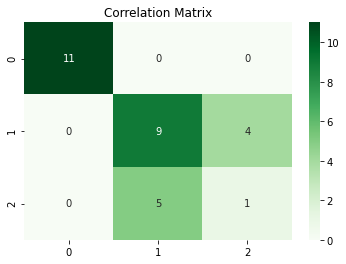

In [46]:
# Plotting the heatmap:

sns.heatmap(cm_PCA,annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Accuracy Score:

ac_PCA = accuracy_score(y_test, y_pred_DT_2)
print("Accuracy Score:", ac_PCA)

Accuracy Score: 0.7


In [48]:
# Classification Report:

print('Classification Report:')
classification_2=classification_report(y_test,y_pred_DT_2)
print(classification_2)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.64      0.69      0.67        13
           2       0.20      0.17      0.18         6

    accuracy                           0.70        30
   macro avg       0.61      0.62      0.62        30
weighted avg       0.69      0.70      0.69        30



--------------